In [1]:
from astropy.io.votable import parse_single_table
import numpy as np
table = parse_single_table("../../data/gaia/1668096011792O-result.vot")

In [2]:
df = table.to_table().to_pandas()

In [3]:
keep_cols = ['source_id', 'parallax', 'phot_g_mean_mag', 'bp_rp']

In [4]:
df = df[keep_cols]

In [5]:
df['M_G'] = df['phot_g_mean_mag']+5*np.log10(df['parallax'])-10

In [6]:
df

,source_id,parallax,phot_g_mean_mag,bp_rp,M_G
0,1358614983131339392,2.686932,9.979286,0.639657,2.125570
1,1358614983131339904,2.583131,16.715607,2.358242,8.776339


## Make HR Diagram from Berger et al. 2020

In [9]:
import astropy

In [16]:
#berger_orig = astropy.io.ascii.read('../../data/gaia/ajab8a33t1_mrt.txt')
#df_berger = berger_orig.to_pandas()
#df_berger['M_G'] = df_berger['gmag']+5*np.log10(df_berger['Par'])-10

In [20]:
df_berger = astropy.io.ascii.read('../../data/gaia/ajab8a33t2_mrt.txt').to_pandas()

In [22]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [23]:
from matplotlib import colors
plt.rc('text', usetex=True)

In [38]:
xbins = np.linspace(3000, 10000, 100)
ybins = np.logspace(-1, 2.5, 100)

In [42]:
import seaborn as sns

In [43]:
sns.set_context('talk')

In [69]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

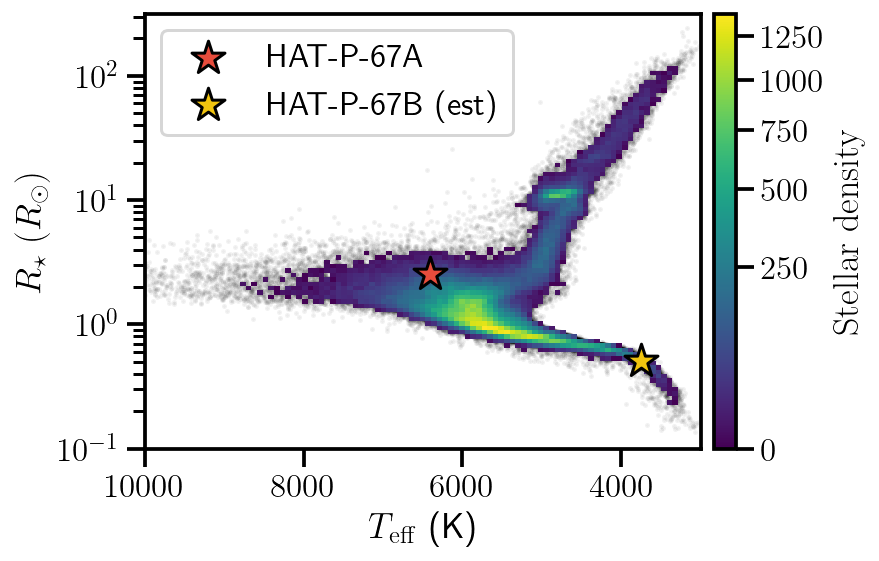

In [71]:
fig, ax = plt.subplots(figsize=(6, 4))
h = ax.hist2d(df_berger['Teff'], df_berger['Rstar'], bins=(xbins, ybins),
              cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(df_berger['Teff'], df_berger['Rstar'], alpha=0.05, s=1, color='k', zorder=0)

#ax.scatter([6406], [2.546], marker='*', s=400, ec='w', c='w', label=None)
ax.scatter([6406], [2.546], marker='*', s=300, ec='k', c='#e74c3c', label='HAT-P-67A')
#ax.scatter([3746], [0.51], marker='*', s=400, ec='w', c='w', label=None)
ax.scatter([3746], [0.51], marker='*', s=300, ec='k', c='#f1c40f', label='HAT-P-67B (est)')

ax.set_yscale('log')
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel(r'$T_{\mathrm{eff}}$ (K)')
ax.set_ylabel(r'$R_\star~(R_\odot)$')
ax.set_xlim(10_000, 3_000)
cb.set_label(r"$\mathrm{Stellar~density}$")
ax.legend()
plt.savefig("../../figures/Gaia_HAT_P_67_AB.png", dpi=300, bbox_inches='tight')